<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Guided-Hunting---Anomaly-detection-with-Isolation-Forest-on-Windows-Logon-data" data-toc-modified-id="Guided-Hunting---Anomaly-detection-with-Isolation-Forest-on-Windows-Logon-data-1">Guided Hunting - Anomaly detection with Isolation Forest on Windows Logon data</a></span><ul class="toc-item"><li><span><a href="#Notebook-initialization" data-toc-modified-id="Notebook-initialization-1.1">Notebook initialization</a></span><ul class="toc-item"><li><span><a href="#Authentication-to-LA-Workspace" data-toc-modified-id="Authentication-to-LA-Workspace-1.1.1">Authentication to LA Workspace</a></span></li></ul></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.2">Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Historical-Data-Processing" data-toc-modified-id="Historical-Data-Processing-1.2.1">Historical Data Processing</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.3">Feature Engineering</a></span></li><li><span><a href="#Data-Modelling" data-toc-modified-id="Data-Modelling-1.4">Data Modelling</a></span><ul class="toc-item"><li><span><a href="#Isolation-Forest-Anomaly-detection" data-toc-modified-id="Isolation-Forest-Anomaly-detection-1.4.1">Isolation Forest Anomaly detection</a></span></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1.5">Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Histogram" data-toc-modified-id="Histogram-1.5.1">Histogram</a></span></li><li><span><a href="#3D-ScatterPlot-using-PCA" data-toc-modified-id="3D-ScatterPlot-using-PCA-1.5.2">3D ScatterPlot using PCA</a></span></li><li><span><a href="#Correlation-Plot" data-toc-modified-id="Correlation-Plot-1.5.3">Correlation Plot</a></span></li></ul></li><li><span><a href="#Interpreting-Global-and-Local-anomalies-with-SHAP" data-toc-modified-id="Interpreting-Global-and-Local-anomalies-with-SHAP-1.6">Interpreting Global and Local anomalies with SHAP</a></span><ul class="toc-item"><li><span><a href="#Global-Interpratation---Summary-plot-for-Feature-Importance" data-toc-modified-id="Global-Interpratation---Summary-plot-for-Feature-Importance-1.6.1">Global Interpratation - Summary plot for Feature Importance</a></span></li><li><span><a href="#Local-Interpretation---Feature-importance" data-toc-modified-id="Local-Interpretation---Feature-importance-1.6.2">Local Interpretation - Feature importance</a></span><ul class="toc-item"><li><span><a href="#Example-Outlier" data-toc-modified-id="Example-Outlier-1.6.2.1">Example Outlier</a></span></li><li><span><a href="#Example-Inlier" data-toc-modified-id="Example-Inlier-1.6.2.2">Example Inlier</a></span></li></ul></li><li><span><a href="#Populate-dataset-with-SHAP-values" data-toc-modified-id="Populate-dataset-with-SHAP-values-1.6.3">Populate dataset with SHAP values</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7">Conclusion</a></span></li></ul></li></ul></div>

# Guided Hunting - Anomaly detection with Isolation Forest on Windows Logon data

 <details>
     <summary>&nbsp;<u>Details...</u></summary>

__Notebook Version:__ 1.0<br>
__Python Version:__ Python 3.8 - AzureML<br>
__Required Packages:__  Msticpy, Msticnb, matplotlib, ipywidgets <br>
__Platforms Supported:__  Azure Machine Learning Notebooks
     
__Data Source Required:__ Yes

__Data Source:__ SecurityEvents

</details>

**Description**

In this sample guided scenario notebook, we will demonstrate how to hunt for anamalous user logon activity using [Isolation forest](https://en.wikipedia.org/wiki/Isolation_forest) model. 
<br>We will start with reading historical windows logon data from Microsoft Sentinel workspace, then we will
prepocess the dataset using series of data preparation steps such as aggregation, summarization, data type conversion, deriving new fields etc. Then we will perform [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering) and select subset of features 
from the data prepared from previous steps to create isolation forest model. Finally, we will run the model to score the results and identify anomalies with higher score.

<br>The isolation forest algorithm will split the data into two parts based on random threshold value. It will recursively continue the splitting until each data point is isolated. Then we will detect anomalies using isolation (how far a data point is to the rest of the data). 
To detect an anomaly the isolation forest takes the average path length (number of splits to isolate a sample) of all the trees 
for a given instance and uses this to determine if it is an anomaly (average shorter path lengths indicate anomalies)

***Disclaimer:***
Some of the sections in the Notebook such as PCA plot visualization , interpreting SHAP values , customizing anomaly algorithm score will require prior knowledge and understanding of data science algorithms and interpreting results or visualization etc which is typically known to Data Scientists. We have included one liner notes about the context and reasoning where possible but may need to refer other resources to grasp the concepts. 

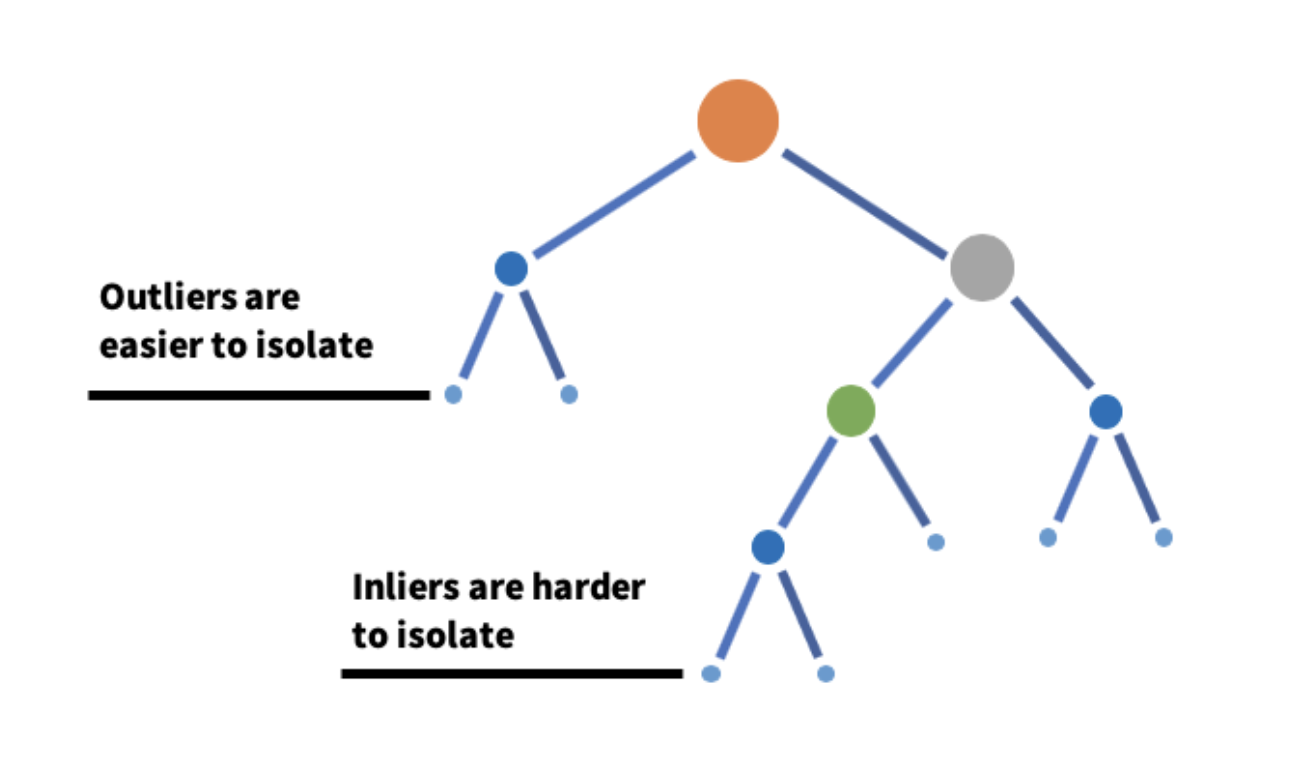

Image Credits: [Detecting and preventing abuse on LinkedIn using isolation forests](https://engineering.linkedin.com/blog/2019/isolation-forest)

***Please run the cells sequentially to avoid errors.
<br>Please do not use "run all cells".*** 

## Notebook initialization
The next cell:
- Checks for the correct Python version
- Checks versions and optionally installs required packages
- Imports the required packages into the notebook
- Sets a number of configuration options.

This should complete without errors. If you encounter errors or warnings look at the following two notebooks:
- [TroubleShootingNotebooks](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/TroubleShootingNotebooks.ipynb)
- [ConfiguringNotebookEnvironment](https://github.com/Azure/Azure-Sentinel-Notebooks/blob/master/ConfiguringNotebookEnvironment.ipynb)

If you are running in the Microsoft Sentinel Notebooks environment (Azure Notebooks or Azure ML) you can run live versions of these notebooks:
- [Run TroubleShootingNotebooks](./TroubleShootingNotebooks.ipynb)
- [Run ConfiguringNotebookEnvironment](./ConfiguringNotebookEnvironment.ipynb)

You may also need to do some additional configuration to successfully use functions such as Threat Intelligence service lookup and Geo IP lookup. 
There are more details about this in the `ConfiguringNotebookEnvironment` notebook and in these documents:
- [msticpy configuration](https://msticpy.readthedocs.io/en/latest/getting_started/msticpyconfig.html)
- [Threat intelligence provider configuration](https://msticpy.readthedocs.io/en/latest/data_acquisition/TIProviders.html#configuration-file)

In [ ]:
from pathlib import Path
import os
import sys
import warnings
import shap
from IPython.display import display, HTML, Markdown, Javascript
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import IsolationForest

REQ_PYTHON_VER = (3, 6)
REQ_MSTICPY_VER = (1, 7, 0)

display(HTML("<h3>Starting Notebook setup...</h3>"))

# You may need to manually install msticpy with
# %pip install msticpy[azsentinel]

import msticpy as mp

mp.init_notebook(namespace=globals())

WIDGET_DEFAULTS = {
    "layout": widgets.Layout(width="95%"),
    "style": {"description_width": "initial"},
}

### Authentication to LA Workspace
 <details>
     <summary>&nbsp;<u>Details...</u></summary>
If you are using user/device authentication, run the following cell. 
- Click the 'Copy code to clipboard and authenticate' button.
- This will pop up an Azure Active Directory authentication dialog (in a new tab or browser window). The device code will have been copied to the clipboard. 
- Select the text box and paste (Ctrl-V/Cmd-V) the copied value. 
- You should then be redirected to a user authentication page where you should authenticate with a user account that has permission to query your Log Analytics workspace.

Use the following syntax if you are authenticating using an Azure Active Directory AppId and Secret:
```
%kql loganalytics://tenant(aad_tenant).workspace(WORKSPACE_ID).clientid(client_id).clientsecret(client_secret)
```
instead of
```
%kql loganalytics://code().workspace(WORKSPACE_ID)
```

Note: you may occasionally see a JavaScript error displayed at the end of the authentication - you can safely ignore this.<br>
On successful authentication you should see a ```popup schema``` button.
To find your Workspace Id go to [Log Analytics](https://ms.portal.azure.com/#blade/HubsExtension/Resources/resourceType/Microsoft.OperationalInsights%2Fworkspaces). Look at the workspace properties to find the ID.
</details>

In [ ]:
# See if we have a Microsoft Sentinel Workspace defined in our config file.
# If not, let the user specify Workspace and Tenant IDs

ws_config = WorkspaceConfig(workspace="Default")
if not ws_config.config_loaded:
    ws_config.prompt_for_ws()

qry_prov = QueryProvider(data_environment="MSSentinel")
# Authentication
qry_prov.connect(ws_config)
table_index = qry_prov.schema_tables

## Data Preparation
In this step, we will prepare the Windows logon events and do some preprocessing before we do data modelling. For this case, we are primarily considering logon event ids 4624, 4625 with specific logon type. 

4624 and 4625 events are related to Successful sign in and Failed Sign-in. You can check more about the event Ids in below links.

- [4624(S): An account was successfully logged on.](https://docs.microsoft.com/windows/security/threat-protection/auditing/event-4624)
- [4625(F): An account failed to log on.](https://docs.microsoft.com/windows/security/threat-protection/auditing/event-4625)

### Historical Data Processing
For this model, we can consider upto 21 days of historical data. If you want to generate this anomalies on recurrent basis then depending on scale and volume of the data, you can set up intermediate pipeline to save historical data into custom table and load results from it. 
Check out the blog for ways to export historical data at scale using notebook [Export Historical Log Data from Microsoft Sentinel](https://techcommunity.microsoft.com/t5/microsoft-sentinel-blog/export-historical-log-data-from-microsoft-sentinel/ba-p/3413418)
For this demo, we are retrieving data from the original table. We also have provided demo dataset if you want to test the notebook without connecting to your workspace.

In [ ]:
win_agg_query = '''
let start = 21d;
let end = 1d;
SecurityEvent
| where TimeGenerated >= startofday(ago(start)) and TimeGenerated <= endofday(ago(end))
| where EventID in (4624, 4625)
| where LogonTypeName == "3 - Network"
| extend DstDomain=TargetDomainName, DstUser=TargetUserName, Date = format_datetime(TimeGenerated, 'yyyy-MM-dd')
| where not (EventID == 4624 and (DstDomain =~ "NT AUTHORITY" or DstDomain =~ "ANONYMOUS LOGON") and LogonType == "3")
| where not (EventID == 4624 and (DstDomain =~ "NT AUTHORITY" or DstDomain =~ "SYSTEM") and LogonType == "5")
| where not (EventID == 4624 and DstDomain =~ "WINDOW MANAGER" and DstUser startswith "DWM-" and LogonType == "2")
| where not (EventID == 4624 and DstDomain =~ "NT VIRTUAL MACHINE")
| where DstUser !endswith "$"
| summarize AttemptedLogons = count() , MAX_TimeGenerated = max(TimeGenerated), MIN_TimeGenerated = min(TimeGenerated), SuccessfulLogons=countif(EventID == 4624), FailedLogons=countif(EventID == 4625), ComputerDomainsAccessed=dcount(TargetDomainName), DistinctAuthenticationPackage=dcount(AuthenticationPackageName), ComputersAccessed = dcount(Computer), DistinctSrcIp= dcount(IpAddress), DistinctSrcHostName = dcount(Workstation), ComputersSuccessfulAccess = dcountif(Computer, EventID == 4624),  ComputerDomainsSuccessfulAccess = dcountif(AccountDomain, EventID == 4624), SrcIpSuccessfulAccess = dcountif(IpAddress, EventID == 4624), SrcHostNameSuccessfulAccess = dcountif(WorkstationName, EventID ==4624) by Date, DstDomain, DstUser, LogonTypeName
| extend ActiveMilliseconds = datetime_diff('millisecond', MAX_TimeGenerated, MIN_TimeGenerated)'''

win_agg_df = qry_prov.exec_query(win_agg_query)

# Uncomment below lines if you want to test the notebook with demo dataset
# dataset_url = "https://raw.githubusercontent.com/Azure/Azure-Sentinel-Notebooks/master/src/data/iforest-demo-data.csv"
# win_agg_df = pd.read_csv(dataset_url)
# win_agg_df.head()

In [ ]:
#Displaying the columns of the data loaded from previous step.
win_agg_df.info()

In [ ]:
# Displaying the no of records
win_agg_df.shape

## Feature Engineering

In this step, we are creating additional features/columns. 

We have selected 4 columns(features) with numeric data points 
- FailedLogons
- SuccessfulLogons
- ComputersSuccessfulAccess
- SrcIpSuccessfulAccess

and also deriving additional columns by calculating mean, standard deviation and zscores on each of them. Converting to zscores is not necessary for numerical features as Isolation forest are scale invariant but this pre-processing is done so as to use these features later in the visualizations such as PCA.  We have also done log scaling as part of data pre-processing steps which is not required but based on various data studies in production environment we have seen it gives finer results. You can skip or add this step based on data study and analyzing results.

In [ ]:
def get_zscore(value, mean, std):
    # calculate z-score or number of standard deviations from mean
    if (
        std == 0
        or std is None
        or str(std).lower() in ["nan", "none", "null"]
        or mean is None
    ):
        if value == 0.0:
            return 0.0
        elif value != 0:
            return np.log10(value + 1)
    ans = (value - mean) / std
    # only interested in increases
    ans = max(0.0, ans)
    # take log to dampen numbers
    ans = np.log10(ans + 1)
    return float(ans)


data = win_agg_df.copy()

zscore_columns = [
    "FailedLogons",
    "SuccessfulLogons",
    "ComputersSuccessfulAccess",
    "SrcIpSuccessfulAccess",
]
means = [x + "_mean" for x in zscore_columns]
stds = [x + "_std" for x in zscore_columns]
zscores = [x + "_zscore" for x in zscore_columns]

ind = ["DstDomain", "DstUser", "Date"]

zscore = data[zscore_columns + ind]
zscore = zscore.fillna(0)

# getting means for user, domain and logon type combination
zscore[means] = zscore.groupby(["DstDomain", "DstUser"])[zscore_columns].transform(
    "mean"
)

# getting standard deviation for user, domain and logon type combination
zscore[stds] = zscore.groupby(["DstDomain", "DstUser"])[zscore_columns].transform(
    "std", ddof=1
)

zscore = zscore.drop_duplicates(["DstDomain", "DstUser"])

zscore = zscore[means + stds + ["DstDomain", "DstUser"]]

data = data.merge(zscore, how="left", on=["DstDomain", "DstUser"])

# Calculating z scores
for column in zscore_columns:
    data[f"{column}_zscore"] = data.apply(
        lambda row: get_zscore(
            row[f"{column}"], row[f"{column}_mean"], row[f"{column}_std"]
        ),
        axis=1,
    )
# Display top 10 record
data.head()

In [ ]:
data.info()

## Data Modelling
In this step we will specify features to be modelled and run isolation forest algorithm against the data.

###  Isolation Forest Anomaly detection

In this step, we will select subset of features generated from previous step and use it for data modelling. We will also use Isolation Forest model on the data with selected features and calculate the anomalies. 

In [ ]:
def apply_isolation_forest(df, n_estimators, contamination=0.01):
    """Applies Isolation Forest to a given dataset and returns the predicted anomalies."""
    clf = IsolationForest(
        n_estimators=n_estimators,
        max_samples="auto",
        contamination=contamination,
        max_features=6,
        bootstrap=False,
        n_jobs=-1,
        random_state=42,
        verbose=0,
    )
    clf.fit(df.values)
    pred = clf.predict(df.values)
    scores = clf.decision_function(df.values)
    return clf, pred, scores

# specify the metrics column names to be modelled
features = [
    "FailedLogons_zscore",
    "SuccessfulLogons_zscore",
    "ComputersSuccessfulAccess_zscore",
    "ComputerDomainsSuccessfulAccess",
    "SrcIpSuccessfulAccess_zscore",
    "SrcHostNameSuccessfulAccess",
]

data[features] = data[features].fillna(0)

X = data[features].copy()
if X.shape[0] < 500:
    n_estimators = len(features) * 4 + X.shape[0] * 2
else:
    n_estimators = 100

# n_estimators = 100
print("Number of trees", n_estimators)

clf, pred, scores = apply_isolation_forest(X, n_estimators, contamination=0.01)
data["anomaly"] = pred
data["score"] = scores * -1
# excluding users who do not have any successful logon history.
data = data.loc[data["SuccessfulLogons"] > 0]
outliers = data.loc[data["anomaly"] == -1]
outlier_index = list(outliers.index)
print(f"Outliers at indexes: {outlier_index}")
# Find the number of anomalies and normal points here points classified -1 are anomalous
print(data["anomaly"].value_counts())

In [ ]:
print("Number of outliers:", outliers.shape[0])
print("Top anomalies by score (top most has highest anomaly score and so on)")
outliers = outliers.sort_values(by=["score"], ascending=False)
display(outliers.head())

## Data Visualization
In this step, we will explore various ways we can visualize the outliers identified from previous step.

### Histogram

In [ ]:
data["anomaly_label"] = data["anomaly"].apply(
    lambda x: "outlier" if x == -1 else "inlier"
)
fig = px.histogram(data, x="score", color="anomaly_label")
fig.show()

### 3D ScatterPlot using PCA

In [ ]:
pca3 = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()
# normalize the metrics
X = scaler.fit_transform(data[features])
X_reduce = pca3.fit_transform(X)


# Add destination user to label
data["labels"] = np.where(
    data["anomaly"] == -1,
    data["Date"].astype("str")
    + " "
    + data["DstDomain"].astype("str")
    + " DstUser "
    + data["DstUser"].astype("str"),
    "non-anomalous",
)

total_var = pca3.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    X_reduce,
    x=0,
    y=1,
    z=2,
    color=data["labels"],
    title=f"Total Explained Variance: {total_var:.2f}%",
    labels={
        "0": "Principal Component 1",
        "1": "Principal Component 2",
        "2": "Principal Component 3",
    },
)
fig.show()

### Correlation Plot

Correlation plot gives idea about how differnt features are correlated to each other. Eg. You will observe linear correlation between FailedLogons with DistinctSrcIp/ DistinctSrcHostName etc. If there are similar correlations between multiple features you can experiment of removing it and see the imapct on outlier results. 

In [ ]:
corrmat = win_agg_df[
    [
        "DistinctAuthenticationPackage",
        "SuccessfulLogons",
        "FailedLogons",
        "ComputersAccessed",
        "ComputerDomainsAccessed",
        "DistinctSrcIp",
        "DistinctSrcHostName",
        "ActiveMilliseconds",
    ]
].corr()

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(50, 29))
sns.heatmap(corrmat, vmin=-1, square=True, cmap="coolwarm", annot=True, mask=mask);

In [ ]:
def get_redundant_pairs(df):
    """Get diagonal and lower triangular pairs of correlation matrix"""
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


print("Top Absolute Correlations between features")
print(get_top_abs_correlations(corrmat, 10))

## Interpreting Global and Local anomalies with SHAP

Global interpretability and local interpretability are two different ways to understand how a machine learning model is making predictions. Global interpretability looks at the model as a whole and tries to understand which features are most important for the model's overall performance. Local interpretability, on the other hand, focuses on a single prediction and tries to understand which features are most important for that particular prediction

SHAP values are generally the difference between the expected output and partial dependence plot at the features value. You can read more scientific details about SHAP values at the documentation.
[Reading-SHAP-values-from-partial-dependence-plots](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html#Reading-SHAP-values-from-partial-dependence-plots)

In [ ]:
def get_index(df, domain, user, date):

    # Use the "loc" method to select rows that match the criteria
    rows = df.loc[
        (df["DstDomain"] == domain) & (df["DstUser"] == user) & (df["Date"] == date)
    ]

    # Check if there are any matching rows
    if len(rows) == 0:
        print("No matching rows found")
        return None

    # Return the index of the first matching row
    return rows.index[0]

# uncomment and replace user values based on your dataset and dates
# outlier_index1 = get_index(data, "CONTOSO", "SRVACC-04", "9/16/2022")
# outlier_index2 = get_index(data, "CONTOSO", "SVC-ACC-02", "9/25/2022")
# print(
#     f"ourlier1 is at index: {outlier_index1} and \noutlier2 is at index: {outlier_index2}"
# )

In [ ]:
explainer = shap.TreeExplainer(clf)  # Explainer
X = data[features].copy()
shap_values = explainer.shap_values(X)  # Calculate SHAP values

### Global Interpratation - Summary plot for Feature Importance
Below we have 3 different visualization for global interpretation. 
<br>For this visualization , we will pass entire `shap_values` matrix instead of single entry.

Here is a short description of these visualization types and how to interprete it.

 - ***Force plot:*** A SHAP force plot shows the contribution of each feature to the final prediction for a single data point. The plot has a horizontal axis that shows the SHAP value, which indicates how much a feature contributed to the prediction (positive values indicate that the feature contributed positively, and negative values indicate that the feature contributed negatively). The plot also has horizontal bars for each feature, which indicate the value of the feature for the data point being analyzed. The bars are colored to show whether the feature value is high (in red) or low (in blue). The width of each bar shows how much the feature contributed to the final prediction.
 - ***Bar plot:*** A SHAP bar plot, on the other hand, shows the feature importance for a set of data points. The plot has a horizontal axis that shows the mean SHAP value for each feature across the set of data points being analyzed. The plot also has vertical bars for each feature, which indicate the feature importance (how much the feature contributed to the prediction on average) and the direction of the effect (positive or negative). The bars are colored to show whether the feature had a positive (in red) or negative (in blue) effect on the prediction.

To interpret the SHAP force plot or bar plot, you should look for features with high absolute SHAP values or feature importance. These are the features that have the greatest impact on the prediction. The direction of the SHAP value or feature importance indicates whether the feature has a positive or negative effect on the prediction. For example, a high positive SHAP value or feature importance for the "number of failed login attempts" feature indicates that a high number of failed login attempts is associated with a higher probability of being an anomaly.

In [ ]:
shap.initjs()  # initialisation of Javascript to load visualization
shap.plots.force(explainer.expected_value, shap_values, feature_names=X.columns)

In [ ]:
shap.summary_plot(shap_values, X)

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

### Local Interpretation - Feature importance
Below we have 3 different visualization for local interpretation. 

For this visualization , we will pass  `shap_values` with index of outlier/inlier instead of whole matrix.

#### Example Outlier

In [ ]:
shap.force_plot(
    explainer.expected_value,
    shap_values[129],
    features=X.iloc[129, :],
    feature_names=X.columns,
)

In [ ]:
shap.bar_plot(shap_values[129], features=X.iloc[129, :], feature_names=X.columns)

In [ ]:
shap.force_plot(
    explainer.expected_value,
    shap_values[103],
    features=X.iloc[103, :],
    feature_names=X.columns,
)

In [ ]:
shap.bar_plot(shap_values[103], features=X.iloc[103, :], feature_names=X.columns)

#### Example Inlier

In [ ]:
shap.force_plot(
    explainer.expected_value,
    shap_values[100],
    features=X.iloc[100, :],
    feature_names=X.columns,
)

In [ ]:
shap.bar_plot(shap_values[100], features=X.iloc[100, :], feature_names=X.columns)

### Populate dataset with SHAP values

Here we will apply SHAP to the data and concatenate SHAP values with the original dataframe so we will have SHAP values with each row in the dataframe for easier analysis without visualization if required.

In [ ]:
# Apply SHAP to the data
shap_values = explainer(data[features])
shap_df = pd.DataFrame(shap_values.values, columns=features)

# Concatenate the SHAP values with the original dataframe
result = pd.concat([data.reset_index(drop=True), shap_df], axis=1)
result.head()

## Conclusion

In this notebook, we started with windows event logs login data with the goal of finding users with anomalous login patterns. This notebook is targetted towards Data Scientists who can use it to tweak at various stages of the executions from Feature Engineering to Data visualization to explore the data in various ways. We have released another version of this Notebook , targetted towards SOC Analysts/Threat hunters who want to investigate the anomalies resulted from this model and triage to investigate any malicious activity.